In [ ]:
!pip install tensorflow
!pip install keras
!pip install imblearn
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 7.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import random

#   Plotting
import seaborn as sns
import matplotlib.pyplot as plt


#   DataGenerator to read images and rescale images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
import tensorflow_addons as tfa

#   count each class samples
from collections import Counter

#   callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau

#   evaluate precison recall and f1-score of each class of model
from sklearn.metrics import classification_report
#   Show performance of a classification model
from sklearn.metrics import confusion_matrix

#   Different layers
from keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Softmax

# split dataset to train, validation and test set
from sklearn.model_selection import train_test_split

#   callbacks
from keras import callbacks

#   SMOTE from imblance library
from imblearn.over_sampling import SMOTE

#   Optimizer
from tensorflow.keras.optimizers import RMSprop

from sklearn.metrics import roc_curve, auc
from itertools import cycle

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Set Path Here before running the code
WORKING_DIRECTORY = ('/content/drive/My Drive/Malimg')

##  Name of classes
CLASSES = ['Adialer.C',
           'Agent.FYI',
           'Allaple.A',
           'Allaple.L',
           'Alueron.gen!J',
           'Autorun.K',
           'C2LOP.gen!g',
           'C2LOP.P',
           'Dialplatform.B',
           'Dontovo.A',
           'Fakerean',
           'Instantaccess',
           'Lolyda.AA1',
           'Lolyda.AA2',
           'Lolyda.AA3',
           'Lolyda.AT',
           'Malex.gen!J',
           'Obfuscator.AD',
           'Rbot!gen',
           'Skintrim.N',
           'Swizzor.gen!E',
           'Swizzor.gen!I',
           'VB.AT',
           'Wintrim.BX',
           'Yuner.A']

IMG_SIZE = 150

In [ ]:
X, y = [], []

## Images rescaling
datagen = ImageDataGenerator(rescale=1.0/255.0)

#   Load images by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory(WORKING_DIRECTORY, target_size=(IMG_SIZE, IMG_SIZE),batch_size=6400, shuffle=True)

### Seperate Dataset from  Data Genrator
X, y = train_dataset.next()

Found 8404 images belonging to 25 classes.


In [ ]:
samples_before = len(X)
print("Images shape :\t", X.shape)
print("Labels shape :\t", y.shape)

Images shape :	 (6400, 64, 64, 3)
Labels shape :	 (6400, 25)


In [ ]:
#   Number of samples in classes
print("Number of samples in each class:\t", sorted(Counter(np.argmax(y, axis=1)).items()))

#   class labels as per indices
print("Classes Names according to index:\t", train_dataset.class_indices)

Number of samples in each class:	 [(0, 75), (1, 68), (2, 2155), (3, 1147), (4, 136), (5, 62), (6, 97), (7, 125), (8, 117), (9, 100), (10, 227), (11, 259), (12, 114), (13, 128), (14, 75), (15, 99), (16, 86), (17, 88), (18, 109), (19, 37), (20, 74), (21, 85), (22, 299), (23, 52), (24, 586)]
Classes Names according to index:	 {'Adialer.C': 0, 'Agent.FYI': 1, 'Allaple.A': 2, 'Allaple.L': 3, 'Alueron.gen!J': 4, 'Autorun.K': 5, 'C2LOP.P': 6, 'C2LOP.gen!g': 7, 'Dialplatform.B': 8, 'Dontovo.A': 9, 'Fakerean': 10, 'Instantaccess': 11, 'Lolyda.AA1': 12, 'Lolyda.AA2': 13, 'Lolyda.AA3': 14, 'Lolyda.AT': 15, 'Malex.gen!J': 16, 'Obfuscator.AD': 17, 'Rbot!gen': 18, 'Skintrim.N': 19, 'Swizzor.gen!E': 20, 'Swizzor.gen!I': 21, 'VB.AT': 22, 'Wintrim.BX': 23, 'Yuner.A': 24}


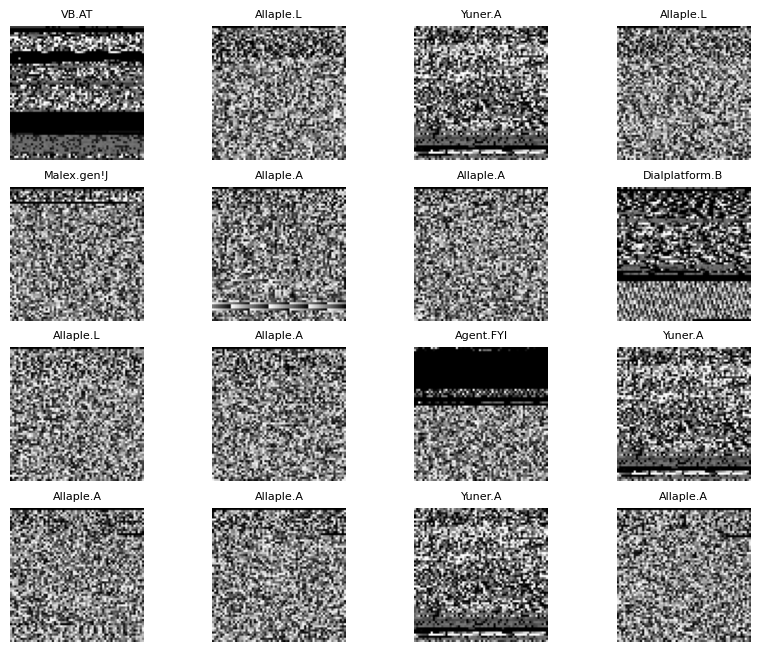

In [ ]:
#   show some samples from the dataset randomly
fig = plt.figure(figsize=(10,8))

rows = 4
columns = 4

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    num = random.randint(0, len(X)-1 )
    plt.imshow(X[num])
    plt.axis('off')
    plt.title(CLASSES[(np.argmax(y[num]))], fontsize=8)
plt.axis('off')
plt.show()

In [ ]:
#   reshaping the images to 1D
X = X.reshape(-1, IMG_SIZE * IMG_SIZE * 3)

#   Oversampling method to remove imbalance class problem
X, y = SMOTE().fit_resample(X, y)

#   reshape images to images size of 208, 176, 3
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

samples_after = len(X)
print("Number of samples after SMOTETomek :\t", sorted(Counter(np.argmax(y, axis=1)).items()))

Number of samples after SMOTETomek :	 [(0, 2155), (1, 2155), (2, 2155), (3, 2155), (4, 2155), (5, 2155), (6, 2155), (7, 2155), (8, 2155), (9, 2155), (10, 2155), (11, 2155), (12, 2155), (13, 2155), (14, 2155), (15, 2155), (16, 2155), (17, 2155), (18, 2155), (19, 2155), (20, 2155), (21, 2155), (22, 2155), (23, 2155), (24, 2155)]


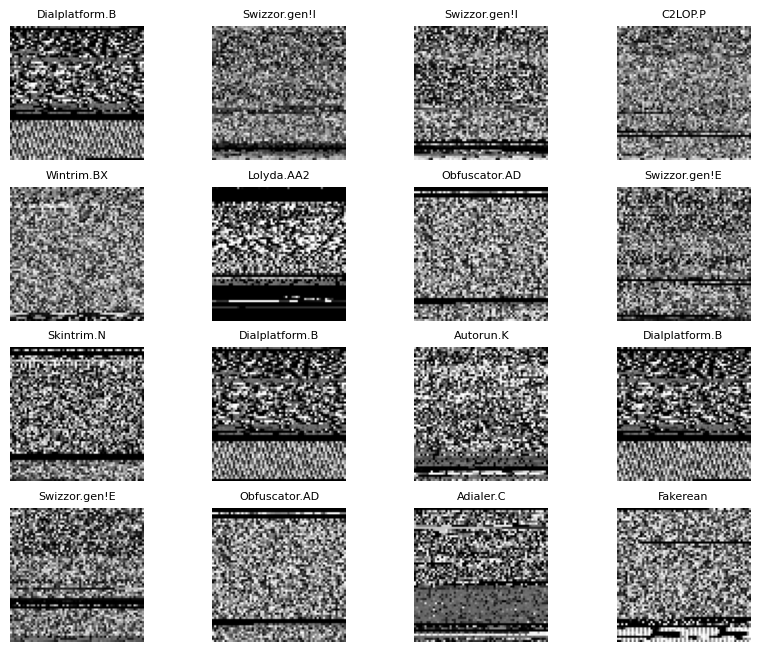

In [ ]:
fig = plt.figure(figsize=(10,8))

rows = 4
columns = 4

for i in range(rows * columns):
    fig.add_subplot(rows, columns, i+1)
    num = random.randint(samples_before, samples_after - 1 )
    plt.imshow(X[num])
    plt.axis('off')
    plt.title(CLASSES[(np.argmax(y[num]))], fontsize=8)
plt.axis('off')
plt.show()

In [ ]:
#   10% split to validation and 90% split to train set
X_train, x_val, y_train, y_val = train_test_split(X,y, test_size = 0.1)

#   10% split to test from 90% of train and 80% remains in train set
X_train, x_test, y_train, y_test = train_test_split(X_train,y_train, test_size = 0.1)

# Number of samples after train test split
print("Number of samples after splitting into Training, validation & test set\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 1743), (1, 1783), (2, 1790), (3, 1794), (4, 1753), (5, 1757), (6, 1746), (7, 1710), (8, 1774), (9, 1763), (10, 1772), (11, 1745), (12, 1733), (13, 1701), (14, 1763), (15, 1728), (16, 1748), (17, 1722), (18, 1720), (19, 1717), (20, 1717), (21, 1751), (22, 1740), (23, 1735), (24, 1733)]
Validation	 [(0, 203), (1, 191), (2, 195), (3, 188), (4, 224), (5, 191), (6, 230), (7, 232), (8, 212), (9, 201), (10, 199), (11, 213), (12, 218), (13, 239), (14, 209), (15, 229), (16, 218), (17, 242), (18, 229), (19, 232), (20, 230), (21, 208), (22, 214), (23, 217), (24, 224)]
Test      	 [(0, 209), (1, 181), (2, 170), (3, 173), (4, 178), (5, 207), (6, 179), (7, 213), (8, 169), (9, 191), (10, 184), (11, 197), (12, 204), (13, 215), (14, 183), (15, 198), (16, 189), (17, 191), (18, 206), (19, 206), (20, 208), (21, 196), (22, 201), (23, 203), (24, 198)]


In [ ]:
#   to free memeory we don't need this one as we split our data
del X, y

In [ ]:
from keras.initializers import LecunUniformV2
init = LecunUniformV2

model = Sequential()

model.add(Input(shape=(IMG_SIZE, IMG_SIZE, 3)))

model.add(Conv2D(8, 3, padding="same", kernel_initializer=init))
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, 3, padding="same", kernel_initializer=init))
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, 3, padding="same", kernel_initializer=init))
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, 3, padding="same", kernel_initializer=init))
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, 3, padding="same", kernel_initializer=init))
model.add(ReLU())
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, kernel_initializer=init))
model.add(ReLU())

model.add(Dense(25, kernel_initializer=init))
model.add(Softmax())

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         224       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        1168      
                                                                 
 re_lu_1 (ReLU)              (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                    

In [ ]:
### Model Compilation
model.compile(
    optimizer = RMSprop(learning_rate=0.0001),
    loss = tf.keras.losses.CategoricalCrossentropy(name='loss'),
    metrics=[
        tf.keras.metrics.CategoricalAccuracy(name='acc'),
        tf.keras.metrics.AUC(name='auc'),
        tfa.metrics.F1Score(num_classes=25),
        tf.metrics.Precision(name="precision"),
        tf.metrics.Recall(name="recall") ])

In [ ]:
# callbacks used in model to perform well
rop_callback = ReduceLROnPlateau(monitor="val_loss", patience=2)

CALLBACKS = [rop_callback]

In [ ]:
# Declare to run on small GPU and create batch sizes of images
valAug = ImageDataGenerator()

# Defining batch size
batch_size = 32

# Train the Model
history = model.fit(
    valAug.flow(X_train, y_train, batch_size=batch_size, shuffle=True),
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=valAug.flow(x_val, y_val, batch_size=batch_size, shuffle=True),
    validation_steps=len(x_val) // batch_size,
    epochs=30,
    callbacks=CALLBACKS,

)


Epoch 1/30
1363/1363 [==============================] - 183s 133ms/step - loss: 1.0850 - acc: 0.6663 - auc: 0.9730 - f1_score: 0.6652 - precision: 0.8914 - recall: 0.5183 - val_loss: 0.3614 - val_acc: 0.8616 - val_auc: 0.9969 - val_f1_score: 0.8458 - val_precision: 0.9036 - val_recall: 0.8129 - lr: 1.0000e-04
Epoch 2/30
1363/1363 [==============================] - 181s 133ms/step - loss: 0.3087 - acc: 0.8716 - auc: 0.9974 - f1_score: 0.8721 - precision: 0.8971 - recall: 0.8433 - val_loss: 0.1927 - val_acc: 0.8997 - val_auc: 0.9987 - val_f1_score: 0.8849 - val_precision: 0.9094 - val_recall: 0.8929 - lr: 1.0000e-04
Epoch 3/30
1363/1363 [==============================] - 173s 127ms/step - loss: 0.1865 - acc: 0.9234 - auc: 0.9989 - f1_score: 0.9237 - precision: 0.9309 - recall: 0.9142 - val_loss: 0.1105 - val_acc: 0.9702 - val_auc: 0.9995 - val_f1_score: 0.9690 - val_precision: 0.9729 - val_recall: 0.9667 - lr: 1.0000e-04
Epoch 4/30
1363/1363 [==============================] - 175s 128ms/

In [ ]:
### Evaluate Model
test_scores = model.evaluate(x_test, y_test, batch_size = 32)


print("\n\nTesting Loss : \t\t {0:0.6f}".format(test_scores[0] ))
print("Testing Accuracy : \t {0:0.6f} %".format(test_scores[1] * 100))
print("Testing AUC : \t\t {0:0.6f} %".format(test_scores[2] * 100))
print("Testing F1-Score : \t {0:0.6f} %".format(
    ((test_scores[3][0] + test_scores[3][1] + test_scores[3][2] + test_scores[3][3] + test_scores[3][4] + test_scores[3][5] + test_scores[3][6] + test_scores[3][7] + test_scores[3][8] + test_scores[3][9] + test_scores[3][10] + test_scores[3][11] + test_scores[3][12] + test_scores[3][13] + test_scores[3][14] + test_scores[3][15] + test_scores[3][16] + test_scores[3][17] + test_scores[3][18] + test_scores[3][19] + test_scores[3][20] + test_scores[3][21] + test_scores[3][22] + test_scores[3][23] + test_scores[3][24])/25) * 100))
print("Testing Precision : \t {0:0.6f} %".format(test_scores[4] * 100))
print("Testing Recall : \t {0:0.6f} %".format(test_scores[5] * 100))

152/152 [==============================] - 9s 56ms/step - loss: 0.0066 - acc: 0.9979 - auc: 0.9999 - f1_score: 0.9977 - precision: 0.9981 - recall: 0.9979


Testing Loss : 		 0.006584
Testing Accuracy : 	 99.793774 %
Testing AUC : 		 99.989200 %
Testing F1-Score : 	 99.773064 %
Testing Precision : 	 99.814355 %
Testing Recall : 	 99.793774 %


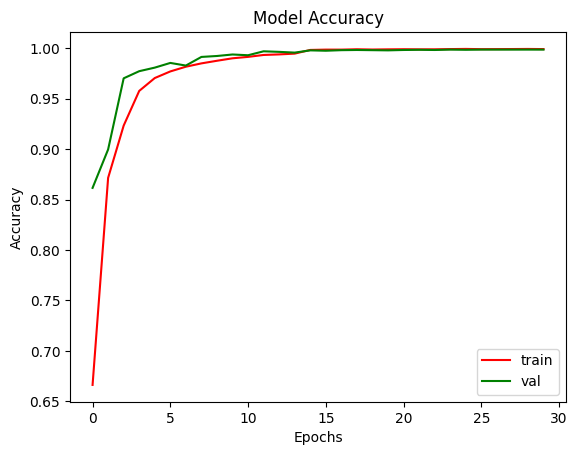

In [ ]:
plt.plot(history.history['acc'], 'r')
plt.plot(history.history['val_acc'], 'g')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

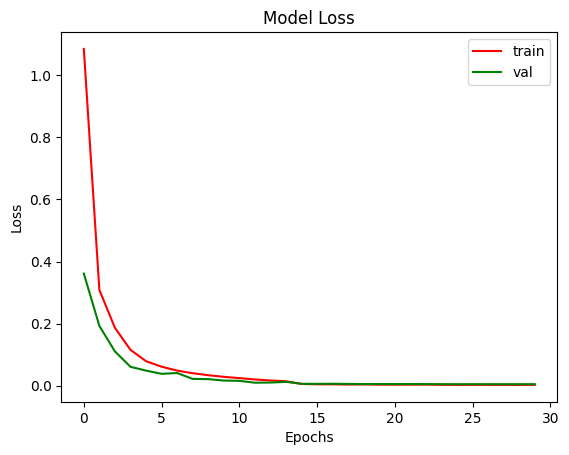

In [ ]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

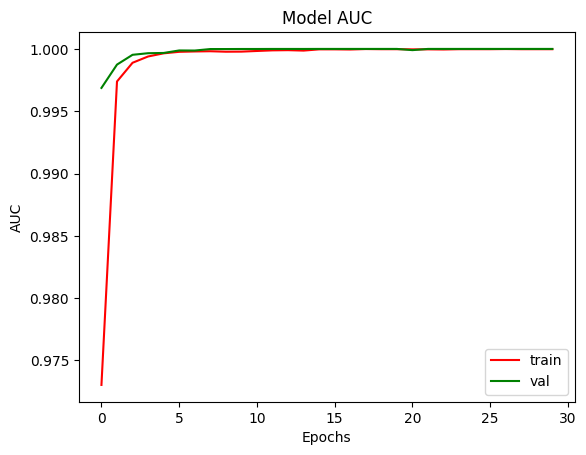

In [ ]:
plt.plot(history.history['auc'], 'r')
plt.plot(history.history['val_auc'], 'g')
plt.title("Model AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend(["train", "val"])
plt.show()

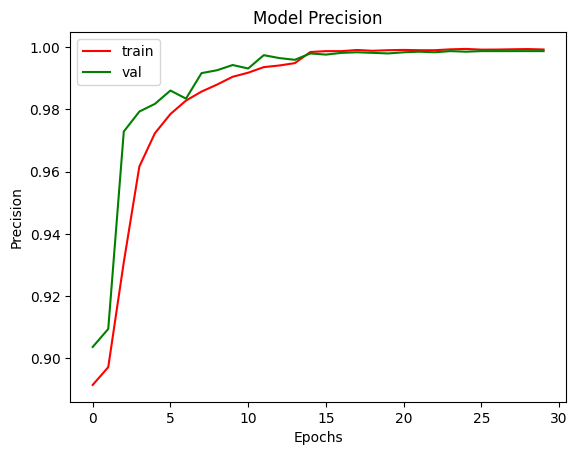

In [ ]:
plt.plot(history.history['precision'], 'r')
plt.plot(history.history['val_precision'], 'g')
plt.title("Model Precision")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.legend(["train", "val"])
plt.show()

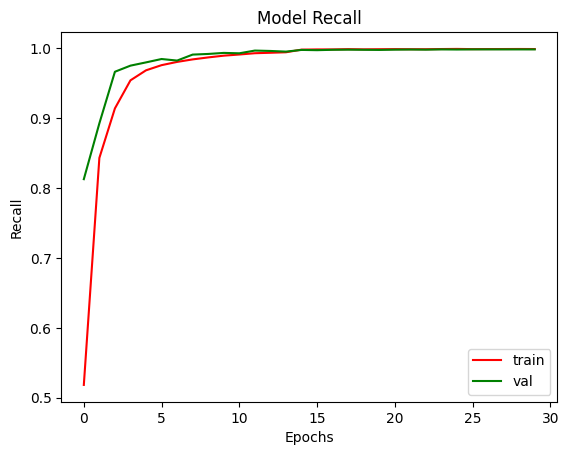

In [ ]:
plt.plot(history.history['recall'], 'r')
plt.plot(history.history['val_recall'], 'g')
plt.title("Model Recall")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend(["train", "val"])
plt.show()

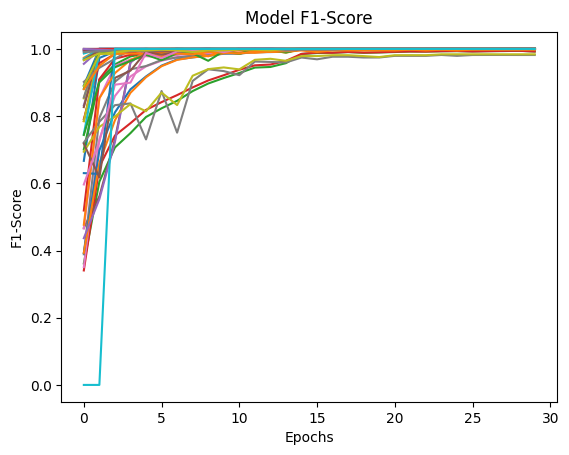

In [ ]:
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title("Model F1-Score")
plt.xlabel("Epochs")
plt.ylabel("F1-Score")
plt.show()

In [ ]:
pred_labels = model.predict(x_test, batch_size=32)

def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(y_test, pred_labels, target_names=CLASSES))


152/152 [==============================] - 7s 48ms/step
                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00       209
     Agent.FYI       1.00      1.00      1.00       181
     Allaple.A       0.98      0.97      0.97       170
     Allaple.L       0.98      0.98      0.98       173
 Alueron.gen!J       1.00      1.00      1.00       178
     Autorun.K       1.00      1.00      1.00       207
   C2LOP.gen!g       1.00      1.00      1.00       179
       C2LOP.P       1.00      1.00      1.00       213
Dialplatform.B       1.00      1.00      1.00       169
     Dontovo.A       1.00      1.00      1.00       191
      Fakerean       1.00      0.99      1.00       184
 Instantaccess       0.99      1.00      1.00       197
    Lolyda.AA1       1.00      1.00      1.00       204
    Lolyda.AA2       1.00      1.00      1.00       215
    Lolyda.AA3       1.00      1.00      1.00       183
     Lolyda.AT       1.00      1.00      1.00  

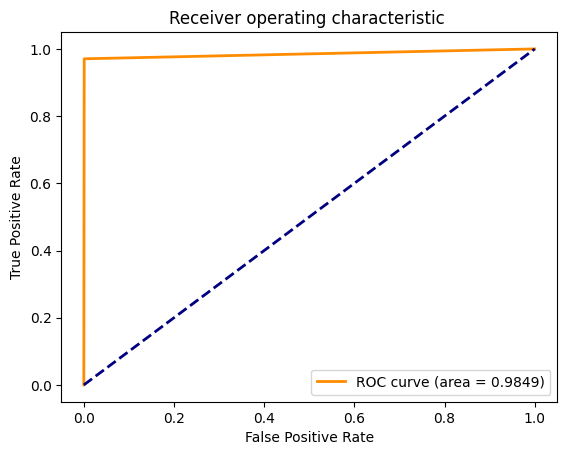

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(25):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_labels[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_labels.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.4f)" % roc_auc[2])

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic ")
plt.legend(loc="lower right")
plt.show()

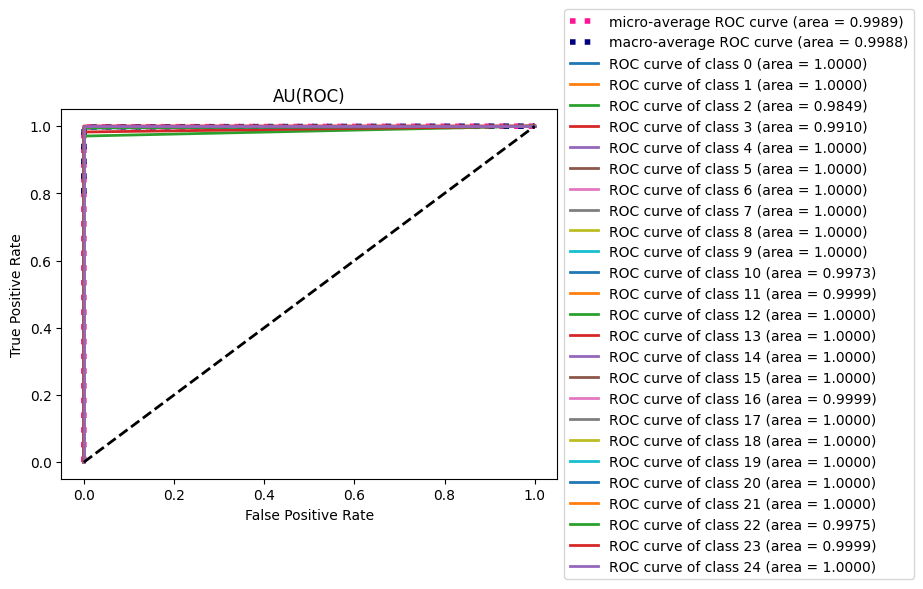

In [ ]:
n_classes = 25
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.4f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.4f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.4f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AU(ROC)")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

In [ ]:
#    To save the model in the current directory
model.save(".\\model.h5")

NameError: ignored